<a href="https://colab.research.google.com/github/abhi-11nav/Text-Emotion-Detection/blob/main/Text_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries 

import pandas as pd
import numpy as np 

In [2]:
!git clone https://github.com/abhi-11nav/Text-Emotion-Detection.git

Cloning into 'Text-Emotion-Detection'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 105 (delta 67), reused 90 (delta 57), pack-reused 1
Receiving objects: 100% (105/105), 43.47 MiB | 15.15 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [3]:
# Importing data

data = pd.read_csv("/content/Text-Emotion-Detection/tweet_emotions.csv")

In [4]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Funeral ceremony...gloomy friday...

In [5]:
# Let us drop the tweet id

data.drop("tweet_id", axis=1, inplace=True)

In [6]:
data.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [7]:
# Let us check if the tweet has any missing values 

data.isna().any()

sentiment    False
content      False
dtype: bool

No missing values

In [8]:
# Let us check the number of categories in sentiment variable

data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Since the data is imbalanced, we'll be deadling with it 

Data Imbalance

### Eliminating the last two categories of sentiment as they are least represented. 

In [9]:
# dropping the last two samples

# Appending indexes to remove
indexes_to_remove = []


for index in data[data['sentiment']=="boredom"].index:
  indexes_to_remove.append(index)

for index in data[data['sentiment']=="anger"].index:
  indexes_to_remove.append(index)

In [10]:
len(indexes_to_remove)

289

In [11]:
data.drop(indexes_to_remove, inplace=True, axis=0)

In [12]:
data["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
Name: sentiment, dtype: int64

In [13]:
labels = [label for label in data["sentiment"].unique()]

In [14]:
balanced_df = pd.DataFrame()

for label in labels: 
  balanced_df = pd.concat([data[data["sentiment"]==label].sample(759),balanced_df], axis=0)

In [15]:
balanced_df["sentiment"].value_counts()

relief        759
happiness     759
hate          759
fun           759
love          759
surprise      759
worry         759
neutral       759
enthusiasm    759
sadness       759
empty         759
Name: sentiment, dtype: int64

 Now we have a balanced dataset

In [16]:
# shuffling samples and resetting indexes

balanced_df = balanced_df.sample(len(balanced_df))

In [17]:
balanced_df.reset_index(inplace=True)

In [18]:
balanced_df.head()

,index,sentiment,content
0,16745,surprise,Sometimes I could swear I really am insane.
1,365,hate,@ksutt11 ohhhh thunderstorms...boo why do the...
2,25186,worry,@sir_benzo the first step to recory is admitti...
3,31091,happiness,@JanieceLincoln Ha... Totally go for it. You'r...
4,23688,neutral,@souljaboytellem Good night


In [19]:
balanced_df.drop("index", inplace=True, axis=1)

In [20]:
# Changing the name of the data frame

data = balanced_df

In [21]:
# Let us look at the sentences

data['content'][0]

'Sometimes I could swear I really am insane.'

In [22]:
data['content'][1]

'@ksutt11 ohhhh thunderstorms...boo  why do they always have to make the power go out??'

Text Preprocessing

In [23]:
# Importing libraries

import re 

import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [24]:
def text_preprocess(dataset,list_name):
  
  for i in range(dataset.shape[0]):
    list_name.append(re.sub('[^a-zA-Z]',' ',str(dataset.iloc[i,1])))

  print("Number and other symbols eliminated from the text")

  # String spacing 
  for x in range(len(list_name)):
    list_name[x] = " ".join(y for y in str(list_name[x]).split()).lower()

  print("Text reorganized and converted to small letter")
  
  for index in range(len(list_name)):
    temp_list= []
    # Lemmatization
    for word in list_name[index].split():
      if word not in stopwords.words('english'):
        temp_list.append(word)
    list_name[index] = " ".join(lemmatizer.lemmatize(words) for words in temp_list )

In [25]:
sample = "This is it& I am going to be very sad, today"

In [26]:
sample = re.sub('[^a-zA-Z]',' ',sample)
sample

'This is it  I am going to be very sad  today'

In [27]:
sample = " ".join(sent.lower() for sent in sample.split())
sample

'this is it i am going to be very sad today'

In [28]:
" ".join(lemmatizer.lemmatize(words) for words in sample.split() if words not in stopwords.words("english"))

'going sad today'

In [29]:
sentences = []

text_preprocess(data,sentences)

Number and other symbols eliminated from the text
Text reorganized and converted to small letter


In [30]:
p_data = pd.concat([pd.DataFrame(np.array(sentences), columns=["Content"]), data['sentiment']], axis=1)

In [31]:
p_data.head()

,Content,sentiment
0,sometimes could swear really insane,surprise
1,ksutt ohhhh thunderstorm boo always make power go,hate
2,sir benzo first step recory admitting,worry
3,janiecelincoln ha totally go journalism major ...,happiness
4,souljaboytellem good night,neutral


In [32]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [33]:
len(words)

235892

## Word2Vec

Pre-trained models

import gensim.downloader

Show all available models in gensim-data

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [99]:
import gensim

import gensim.downloader

from gensim.models import Word2Vec

In [100]:
sentences = [sentence for sentence in p_data["Content"]]

In [101]:
for index in range(len(sentences)):
  sentences[index] = sentences[index].split()

In [102]:
import numpy as np 

np.zeros(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
glove_vectors = gensim.downloader.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [103]:
for index in range(len(sentences)):
  temp = [glove_vectors[word] for word in sentences[index] if word in glove_vectors.vocab]
  sentences[index] = temp

In [104]:
max_length = 0

for sent in sentences:
  if len(sent)>max_length:
    max_length = len(sent)

In [105]:
for index in range(len(sentences)):
  while(len(sentences[index])!=27):
    sentences[index].append(np.zeros(100))

In [115]:
for index in range(len(sentences)):
  sentences[index] = np.array(sentences[index])

In [131]:
X = np.array(sentences)

Text preprocessing done

Reference : https://phdstatsphys.wordpress.com/2018/12/27/word2vec-how-to-train-and-update-it/

We have vectors stored in **vectors**

## One hot encoding - padding

In [ ]:
for index in range(len(sentences)):
  sentence_list = []

  for word in sentences[index].split():
    if word in words:
      sentence_list.append(word)
  
  sentences[index] = sentence_list

In [ ]:
for index in range(len(sentences)):
  sentences[index] = " ".join(sent for sent in sentences[index])

In [ ]:
unique_words = set()

for sent in sentences:
  for word in sent:
    unique_words.add(word)

In [ ]:
unique_words = list(unique_words)

In [ ]:
# The length of unique words will be vocabulary size

vocabulary_size = len(unique_words)

In [ ]:
# Importing libraries for one hot encoding 

from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
sent_tokens = []

for sent in sentences:
  temp_list = []
  for word in sent.split():
    temp_list.append(word)
  
  sent_tokens.append(temp_list)

In [ ]:
[word for word in sent_tokens[0]]

['love',
 'night',
 'wish',
 'span',
 'week',
 'gossip',
 'girl',
 'big',
 'bang',
 'theory',
 'met',
 'mother',
 'hill']

In [ ]:
sentences = [str(sent) for sent in sentences]

In [ ]:
vocabulary_size

27

In [ ]:
one_hot_vectors = []

for sent in sent_tokens:
  one_hot_vec = []
  for words in sent:
    one_hot_vec.append(one_hot(words,vocabulary_size)[0])
  
  one_hot_vectors.append(one_hot_vec)

In [ ]:
# Importing libraries necessary for padding sequence

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Finding the sentence length 

max_len = 0

for sent in sent_tokens:
  if len(sent)>max_len:
    max_len = len(sent)

In [ ]:
# Padding sequences 

embedded_docs = pad_sequences(one_hot_vectors,maxlen=max_len, padding='post')

In [ ]:
embedded_docs[0]

array([17, 14, 18,  4,  8, 25, 15,  8,  7,  1, 20, 25, 19,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

In [ ]:
X = embedded_docs

In [ ]:
max_len

20

In [124]:
# Grabbing the labels

y = p_data['sentiment']

labels = []
corresponding_num = []

for ind,lab in enumerate(y.unique()):
  labels.append(lab)
  corresponding_num.append(ind)

encodings = [val for val in y]

for i,value in enumerate(encodings):
  for ind,unique in enumerate(labels):
    if value==unique:
      encodings[i] = ind
      
encodings = np.array(encodings)

y = encodings

encoding y into vectors of size 13

In [125]:
from tensorflow.keras.utils import to_categorical

In [126]:
y = to_categorical(y,13)

Train-test-split

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.12, random_state=122, shuffle=True, stratify=y)

In [135]:
train_X.shape

(7347, 27, 100)

In [136]:
train_y.shape

(7347, 13)

In [137]:
test_X.shape

(1002, 27, 100)

In [138]:
test_y.shape

(1002, 13)

In [81]:
train_X[0].shape

(27, 100)

In [ ]:
"""
Call arguments received by layer "sequential_1" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None
      """

'\nCall arguments received by layer "sequential_1" (type Sequential):\n      • inputs=tf.Tensor(shape=(None,), dtype=int64)\n      • training=False\n      • mask=None\n      '

In [ ]:
test_X[0]

array([20, 18, 22,  4, 16,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

## Birdectional LSTM RNN MODEL

Implementing Bi-directional Long short term Memory recurrent neural network 

In [139]:
# Importing the necessary libraries

import tensorflow 
from tensorflow import keras

from keras.layers import Dense, Flatten, Input, LSTM, Bidirectional, Embedding, Dropout, CuDNNLSTM
from keras.models import Model, Sequential

The fluctuations are normal within certain limits and depend on the fact that you use a heuristic method but in your case they are excessive. Despite all the performance takes a definite direction and therefore the system works. From the graphs you have posted, the problem depends on your data so it's a difficult training. If you have already tried to change the learning rate try to change training algorithm. You would agree to test your data: first compute the Bayes error rate using a KNN (use the trick regression in case you need), in this way you can check whether the input data contain all the information you need. Then try the LSTM without the validation or dropout to verify that it has the ability to achieve the result for you necessary. If the training algorithm is not suitable you should have the same problems even without the validation or dropout. Just at the end adjust the training and the validation size to get the best result in the test set. Statistical learning theory is not a topic that can be talked about at one time, we must proceed step by step.


source :https://stats.stackexchange.com/questions/345990/why-does-the-loss-accuracy-fluctuate-during-the-training-keras-lstm

In [140]:
## Creating model

embedding_vector_features=300
model=Sequential()
model.add(Input(shape=(27,100)))
model.add(Bidirectional(LSTM(256,return_sequences=True)))
model.add(Dropout(0.15))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(13,activation='softmax'))

In [141]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 27, 512)          731136    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 27, 512)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 13)               

In [142]:
# Importing library for optimizer
from keras import optimizers

# adam optimizer with custom learning rate
from keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-5)


# Compiling the modle 
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

Keras callbacks

In [143]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [147]:
patience = EarlyStopping(patience=300)

save_best = ModelCheckpoint("lstm_model.h5", save_best_only=True)

In [148]:
history = model.fit(train_X, train_y,validation_data=(test_X, test_y),epochs=400, callbacks=(patience, save_best))

Epoch 1/400
230/230 [==============================] - 4s 17ms/step - loss: 1.7621 - accuracy: 0.3983 - val_loss: 2.2304 - val_accuracy: 0.2275
Epoch 2/400
230/230 [==============================] - 4s 16ms/step - loss: 1.7603 - accuracy: 0.3987 - val_loss: 2.2356 - val_accuracy: 0.2216
Epoch 3/400
230/230 [==============================] - 4s 16ms/step - loss: 1.7542 - accuracy: 0.4034 - val_loss: 2.2405 - val_accuracy: 0.2365
Epoch 4/400
230/230 [==============================] - 4s 16ms/step - loss: 1.7496 - accuracy: 0.4052 - val_loss: 2.2402 - val_accuracy: 0.2255
Epoch 5/400
230/230 [==============================] - 4s 16ms/step - loss: 1.7454 - accuracy: 0.4017 - val_loss: 2.2428 - val_accuracy: 0.2226
Epoch 6/400
230/230 [==============================] - 4s 17ms/step - loss: 1.7429 - accuracy: 0.4053 - val_loss: 2.2385 - val_accuracy: 0.2305
Epoch 7/400
230/230 [==============================] - 4s 16ms/step - loss: 1.7349 - accuracy: 0.4070 - val_loss: 2.2402 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

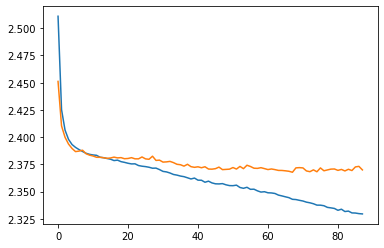

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

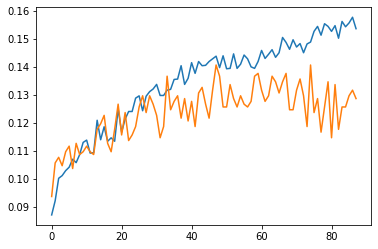

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
test_X[3]

array([13746,  8197,  3877, 11394,  8878,  6805, 12253,  6289,  1171,
        7986, 10534,  6552,   175,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [ ]:
test_y[3]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
prediction = model.predict(test_X[3].reshape(1,-1))

1/1 [==============================] - 0s 17ms/step


In [ ]:
np.argmax(prediction)

7

In [ ]:
test

(27, 1)